In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml

In [8]:
data_with_overlapping = pd.read_csv('../../experiments/umap_uci_p75/data.csv')
data_with_overlapping['score'].max()

0.7697058823529411

In [7]:
data_without_overlapping = pd.read_csv('../../experiments/umap_uci_p75_compound/data.csv')
data_without_overlapping['score'].max()

0.7723529411764706

In [10]:
with open(f'../../execute_once_experiments/_previous/TV_sb_no_reducer/scores/no_reducer_uci.yaml') as f:
    score = yaml.load(f, Loader=yaml.FullLoader)
    score = score['score']
    print(score)

0.8470588235294118


(0.3, 1.0)

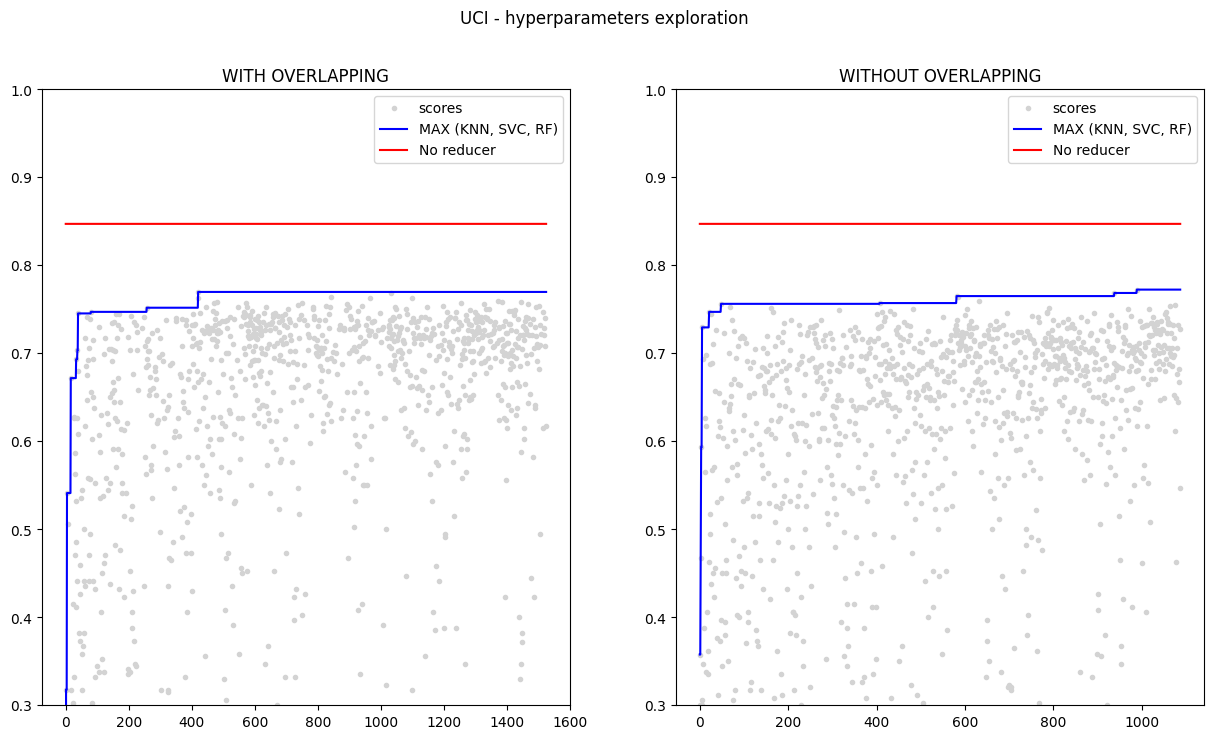

In [13]:
# Plot all data points
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
plt.suptitle(f'UCI - hyperparameters exploration')
axs[0].set_title(f'WITH OVERLAPPING')
axs[0].plot(data_with_overlapping['Unnamed: 0'], data_with_overlapping['score'], '.', color='lightgray', label='scores')
axs[0].plot(data_with_overlapping['score'].cummax(), color='blue', label='MAX (KNN, SVC, RF)')
axs[0].plot(data_with_overlapping['Unnamed: 0'], [score]*len(data_with_overlapping), color='red', label='No reducer')
axs[0].legend()
axs[0].set_ylim([0.3, 1.0])
axs[1].set_title(f'WITHOUT OVERLAPPING')
axs[1].plot(data_without_overlapping['Unnamed: 0'], data_without_overlapping['score'], '.', color='lightgray', label='scores')
axs[1].plot(data_without_overlapping['score'].cummax(), color='blue', label='MAX (KNN, SVC, RF)')
axs[1].plot(data_without_overlapping['Unnamed: 0'], [score]*len(data_without_overlapping), color='red', label='No reducer')
axs[1].legend()
axs[1].set_ylim([0.3, 1.0])

In [19]:
data_with_overlapping.columns

Index(['Unnamed: 0', 'score', 'num_params', 'num_trainable_params',
       'error_type', 'error_message', 'error_traceback', 'timestamp', 'done',
       'training_iteration', 'trial_id', 'date', 'time_this_iter_s',
       'time_total_s', 'pid', 'hostname', 'node_ip', 'time_since_restore',
       'iterations_since_restore', 'checkpoint_dir_name', 'config/umap_ncomp',
       'config/umap_spread', 'config/umap_mdist', 'config/umap_neigh',
       'config/umap_epochs', 'logdir', 'randomforest-100-accuracy (mean)',
       'randomforest-100-accuracy (std)',
       'randomforest-100-f1-score macro (mean)',
       'randomforest-100-f1-score macro (std)',
       'randomforest-100-f1-score weighted (mean)',
       'randomforest-100-f1-score weighted (std)', 'KNN-5-accuracy (mean)',
       'KNN-5-accuracy (std)', 'KNN-5-f1-score macro (mean)',
       'KNN-5-f1-score macro (std)', 'KNN-5-f1-score weighted (mean)',
       'KNN-5-f1-score weighted (std)', 'SVM-rbf-C1.0-accuracy (mean)',
       'SVM-r

In [25]:
with_o_groups = []
without_o_groups = []
interval = 200
start = 0
while start < len(data_with_overlapping):
    with_o_groups.append(data_with_overlapping.iloc[start:start+interval, 1])
    start += interval
start = 0
while start < len(data_without_overlapping):
    without_o_groups.append(data_without_overlapping.iloc[start:start+interval, 1])
    start += interval
print(data_with_overlapping.shape, [group.shape for group in with_o_groups])
print(data_without_overlapping.shape, [group.shape for group in without_o_groups])

(1525, 44) [(200,), (200,), (200,), (200,), (200,), (200,), (200,), (125,)]
(1088, 41) [(200,), (200,), (200,), (200,), (200,), (88,)]


(0.3, 1.0)

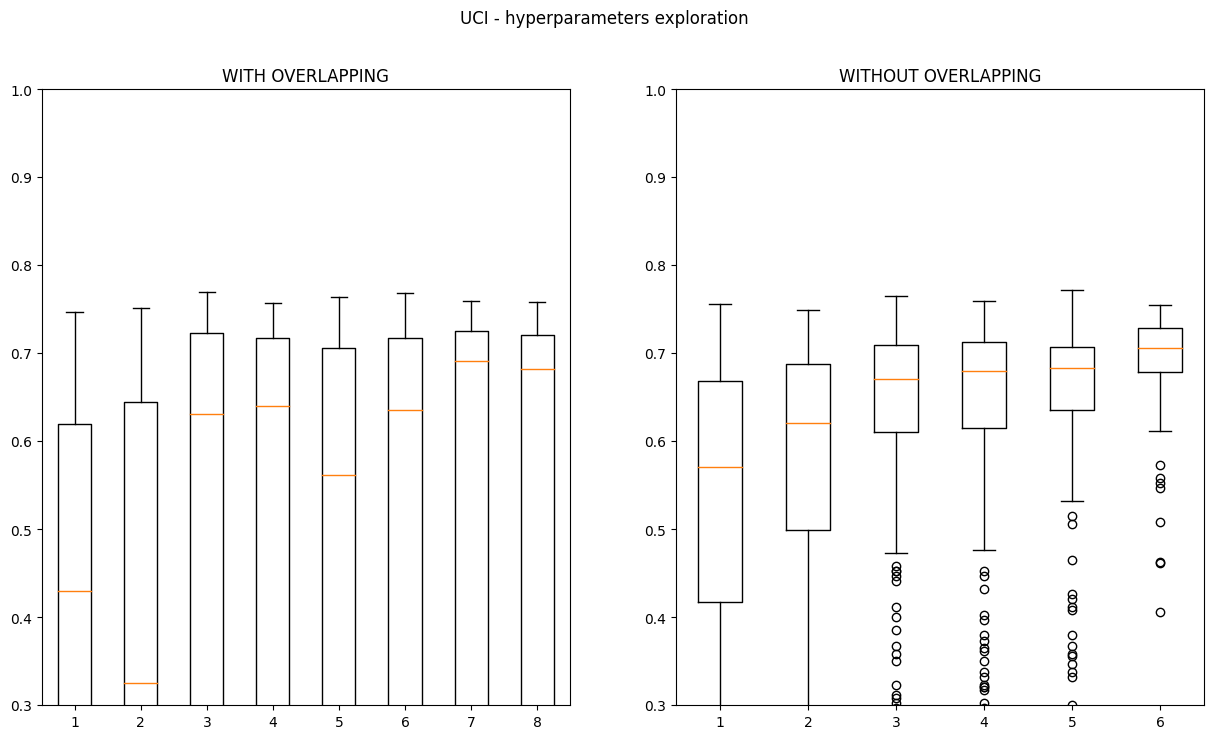

In [26]:
# Plot boxplots for every group in with_o_groups
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
plt.suptitle(f'UCI - hyperparameters exploration')
axs[0].set_title(f'WITH OVERLAPPING')
axs[0].boxplot(with_o_groups)
axs[0].set_ylim([0.3, 1.0])
axs[1].set_title(f'WITHOUT OVERLAPPING')
axs[1].boxplot(without_o_groups)
axs[1].set_ylim([0.3, 1.0])
